## Aula 01 - Combinação de classificadores (Ensemble) - Exemplo prático

Neste notebook, veremos um exemplo do uso de uma técnica de combinação de classificadores heterogêneos com o objetivo de alcançar um melhor desempenho preditivo em uma tarefa de classificação multiclasse.

Leia as instruções e execute as células abaixo.

Primeiro, iniciaremos importando a biblioteca numpy e o conjunto de dados que utilizaremos no exemplo. Neste caso, vamos usar o dataset de classificação de vinhos do repositório de machine learning da UCI.

O objetivo da tarefa é classificar uma amostra em uma das três classes existentes.

In [1]:
import numpy as np

from sklearn.datasets import load_wine

dados = load_wine()
X = dados.data
Y = dados.target

Com nosso dataset carregado, podemos dividi-lo em treino e teste.
Dessa vez, usaremos 80% das amostras para treino e 20% para teste.

O parâmetro "stratify" nos permite realizar essa divisão preservando as proporções de cada classe como observadas no dataset original.

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                            test_size = 0.2,
                                            random_state=42,
                                            stratify=Y)

print(X_train.shape)
print(X_test.shape)
print(np.unique(y_test))

(142, 13)
(36, 13)
[0 1 2]


Agora, podemos começar a treinar classificadores individuais com o objetivo de combiná-los posteriormente.

Vamos gerar um modelo usando o algoritmo de árvore de decisão e verificar seu desempenho por meio da acurácia balanceada.

In [3]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_pred = dtc.predict(X_test)
dtc_proba = dtc.predict_proba(X_test)

balanced_accuracy_score(y_test, dtc_pred)

0.9722222222222222

Treinamos um classificador usando o algoritmo de vizinho mais próximo.

In [4]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

knc_pred = knc.predict(X_test)
knc_proba = knc.predict_proba(X_test)

balanced_accuracy_score(y_test, knc_pred)

0.8047619047619049

Treinamos outro classificador usando o algoritmo de máquina de vetores de suporte.

In [5]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

svc_pred = svc.predict(X_test)
svc_proba = svc.predict_proba(X_test)

balanced_accuracy_score(y_test, svc_pred)

0.6388888888888888

Treinamos outro classificador usando o algoritmo Naive Bayes multionomial.

In [6]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)

mnb_pred = mnb.predict(X_test)
mnb_proba = mnb.predict_proba(X_test)

balanced_accuracy_score(y_test, mnb_pred)

0.8912698412698412

Por fim, utilizamos um Peceptron multicamadas para treinar o último classificador individual.

In [7]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

mlp_pred = mlp.predict(X_test)
mlp_proba = mlp.predict_proba(X_test)

balanced_accuracy_score(y_test, mlp_pred)

/home/fonta42/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9388888888888888

Agora, vamos inicar o processo de combinação dos modelos.

Primeiro, utilizaremos o método de votação majoritária simples.
> Considerando as predições de cada classificador, o comitê seleciona a classe com a maioria dos votos para cada uma das amostras.

In [8]:
from scipy.stats import mode

voting_pred = mode(np.vstack( [dtc_pred, knc_pred, svc_pred, mnb_pred, mlp_pred] ) )

balanced_accuracy_score(y_test, voting_pred[0][0])

0.9666666666666667

Também podemos combinar as probabilidades ou scores emitidos por cada classificador individual.


> Neste caso, somamos as probabilidades e usamos o maior score para determinar a predição do comitê.



In [9]:
sum_proba = dtc_proba + knc_proba + svc_proba + mnb_proba + mlp_proba
balanced_accuracy_score(y_test, np.argmax(sum_proba, axis=1))

0.9722222222222222

Também poderíamos utilizar o módulo VotingClassifier da biblioteca sklearn.

Dessa forma, economizamos algumas linhas de código. O método já realiza o treino de cada um dos modelos, basta que estejam instanciados anteriormente.


> O parâmetro "voting" determina o tipo de estratégia utilazada na combinação. Pra votação simples usamos 'hard', para utilizar as probalidades usamos 'soft'.



In [10]:
from sklearn.ensemble import VotingClassifier

comite = VotingClassifier(estimators=[('dtc', dtc), ('knc', knc), ('svc', svc), ('mnb', mnb),('mlp', mlp)], voting='soft')

comite.fit(X_train, y_train)
comite_pred = comite.predict(X_test)

balanced_accuracy_score(y_test, comite_pred)

/home/fonta42/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9722222222222222

Observe que o desempenho do comitê de classificadores supera cada classificador individual.

Com isso finalizamos o exemplo do uso de combinação de classificadores.

Bons estudos! :)

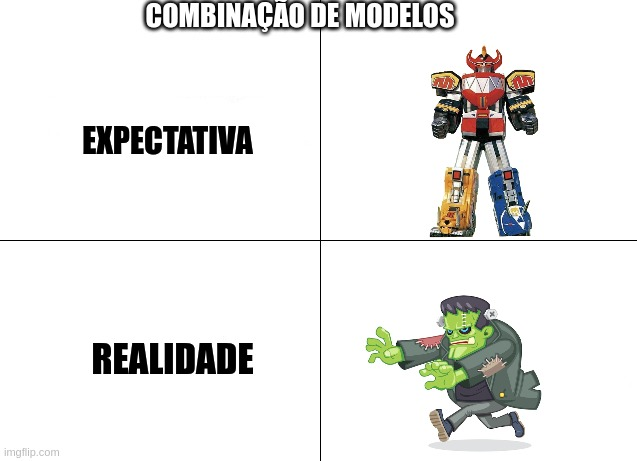